In [25]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, BallTree, KDTree 


In [2]:
#IMPORT CLEANED DATASET FROM CSV FILE
cardio_clean = pd.read_csv('Dataset\cardio_clean.csv')

In [3]:
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,M,168,62.0,22.0,110,80,N,N,0,0,1,0
1,1,55,F,156,85.0,34.9,140,90,H,N,0,0,1,1
2,2,52,F,165,64.0,23.5,130,70,H,N,0,0,0,1
3,3,48,M,169,82.0,28.7,150,100,N,N,0,0,1,1
4,8,60,F,151,67.0,29.4,120,80,B,B,0,0,0,0


In [4]:
cardio_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58880 entries, 0 to 58879
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      58880 non-null  int64  
 1   Age     58880 non-null  int64  
 2   Gender  58880 non-null  object 
 3   Height  58880 non-null  int64  
 4   Weight  58880 non-null  float64
 5   BMI     58880 non-null  float64
 6   AP_HI   58880 non-null  int64  
 7   AP_LO   58880 non-null  int64  
 8   Chol    58880 non-null  object 
 9   Gluc    58880 non-null  object 
 10  Smoke   58880 non-null  int64  
 11  Alco    58880 non-null  int64  
 12  Active  58880 non-null  int64  
 13  Cardio  58880 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 6.3+ MB


# K-Nearest Neighbors

In [5]:
#change categorical-level to numeric-level

cardio_clean['Chol']=cardio_clean['Chol'].replace(['N','B','H'],[0,5,10]) 
cardio_clean['Gluc']=cardio_clean['Gluc'].replace(['N','B','H'],[0,5,10])
cardio_clean['Gender']=cardio_clean['Gender'].replace(['M','F'],[0,1])
cardio_clean.head()

,id,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active,Cardio
0,0,50,0,168,62.0,22.0,110,80,0,0,0,0,1,0
1,1,55,1,156,85.0,34.9,140,90,10,0,0,0,1,1
2,2,52,1,165,64.0,23.5,130,70,10,0,0,0,0,1
3,3,48,0,169,82.0,28.7,150,100,0,0,0,0,1,1
4,8,60,1,151,67.0,29.4,120,80,5,5,0,0,0,0


In [6]:
# Separate the predictors to X and Response to y
y =cardio_clean['Cardio']
X =cardio_clean.drop(['Cardio'],axis=1)
X =X.drop(['id'],axis=1)
X.head()

,Age,Gender,Height,Weight,BMI,AP_HI,AP_LO,Chol,Gluc,Smoke,Alco,Active
0,50,0,168,62.0,22.0,110,80,0,0,0,0,1
1,55,1,156,85.0,34.9,140,90,10,0,0,0,1
2,52,1,165,64.0,23.5,130,70,10,0,0,0,0
3,48,0,169,82.0,28.7,150,100,0,0,0,0,1
4,60,1,151,67.0,29.4,120,80,5,5,0,0,0


In [33]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

train Classification report:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79     22397
           1       0.78      0.76      0.77     21763

    accuracy                           0.78     44160
   macro avg       0.78      0.78      0.78     44160
weighted avg       0.78      0.78      0.78     44160

Matthews corrcoef  (MCC) 	: 0.5589864004315463
train accuracy: 0.7795289855072464

test Classification report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70      7482
           1       0.69      0.67      0.68      7238

    accuracy                           0.69     14720
   macro avg       0.69      0.69      0.69     14720
weighted avg       0.69      0.69      0.69     14720

Matthews corrcoef  (MCC) 	: 0.3727864402062122
test accuracy : 0.6865489130434783



<AxesSubplot:>

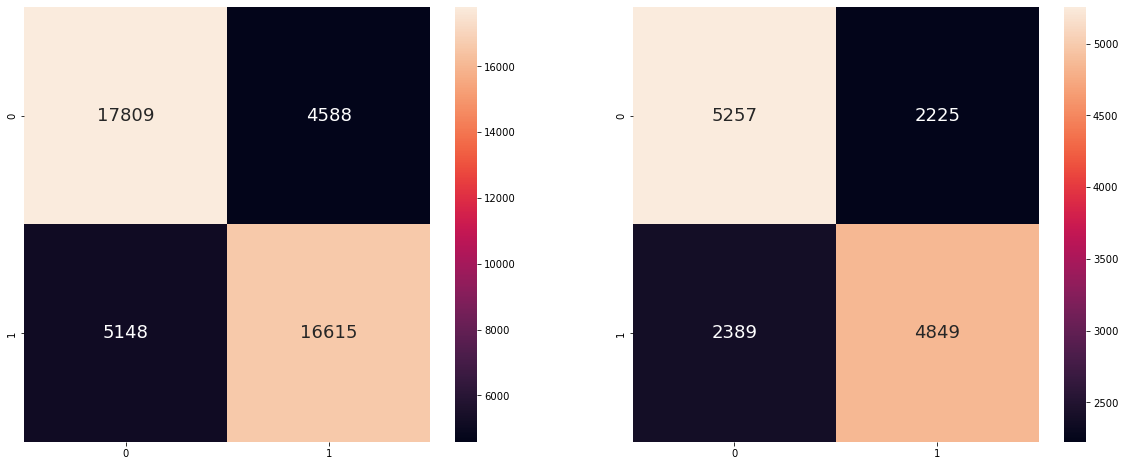

In [8]:
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_train_as = accuracy_score(y_train,y_train_pred)
knn_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", knn_train_mcc)
print('train accuracy:', knn_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", knn_test_mcc)
print('test accuracy :', knn_test_as)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [9]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

### Hyperparameter tuning

In [10]:
#hyperparameter optimization for k values
error = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_vali)
    error.append(np.mean(pred_i != y_vali))

Text(0, 0.5, 'Mean Error')

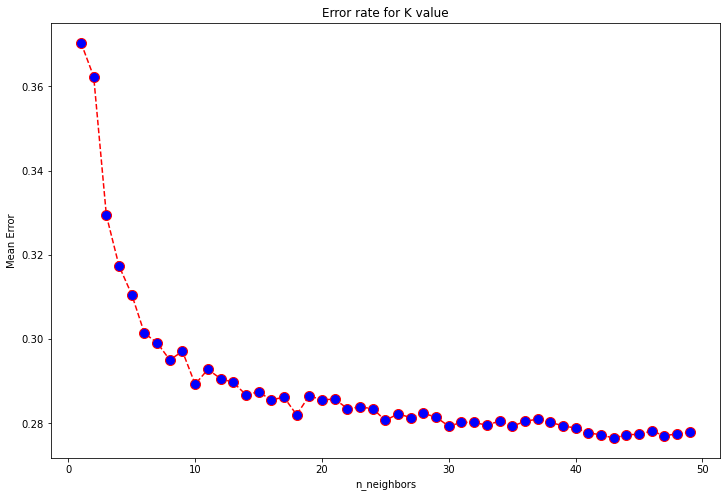

In [11]:
plt.figure(figsize = (12,8))
plt.plot((range(1,50)), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error rate for K value')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Error')

<AxesSubplot:>

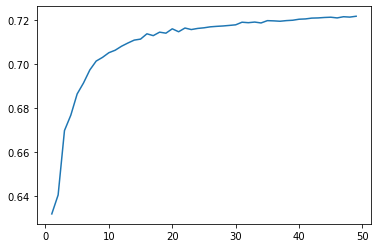

In [17]:
#hyperparameter optimization for k values
k_range = range(1, 50)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean())

sb.lineplot(x = k_range, y = k_scores)

In [34]:
# Weights parameter

knn = KNeighborsClassifier(n_neighbors = 40 )
parameter_space = {
    'weights' : ['uniform', 'distance'],
}
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'weights': 'uniform'}
0.719 (+/-0.005) for {'weights': 'uniform'}
0.712 (+/-0.006) for {'weights': 'distance'}


In [35]:
# Algorithm parameter

knn = KNeighborsClassifier(n_neighbors = 40, weights = 'uniform' )
parameter_space = {
    'algorithm' : ['auto', 'ball_tree' ,'kd_tree', 'brute'],
}
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'algorithm': 'ball_tree'}
0.719 (+/-0.005) for {'algorithm': 'auto'}
0.719 (+/-0.006) for {'algorithm': 'ball_tree'}
0.719 (+/-0.005) for {'algorithm': 'kd_tree'}
0.719 (+/-0.004) for {'algorithm': 'brute'}


In [36]:
# Leaf_size parameter

knn = KNeighborsClassifier(n_neighbors = 40, weights = 'uniform', algorithm = 'ball_tree')
parameter_space = {
    'leaf_size' : [5, 10, 20, 30, 40, 50, 100, 200],
}
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'leaf_size': 20}
0.719 (+/-0.005) for {'leaf_size': 5}
0.719 (+/-0.005) for {'leaf_size': 10}
0.719 (+/-0.006) for {'leaf_size': 20}
0.719 (+/-0.006) for {'leaf_size': 30}
0.719 (+/-0.005) for {'leaf_size': 40}
0.719 (+/-0.005) for {'leaf_size': 50}
0.719 (+/-0.005) for {'leaf_size': 100}
0.719 (+/-0.005) for {'leaf_size': 200}


In [37]:
# p parameter

knn = KNeighborsClassifier(n_neighbors = 40, weights = 'uniform', algorithm = 'ball_tree')
parameter_space = {
    'p' : [1, 2],
}
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'p': 1}
0.719 (+/-0.003) for {'p': 1}
0.719 (+/-0.006) for {'p': 2}


train Classification report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.75     22397
           1       0.77      0.66      0.71     21763

    accuracy                           0.73     44160
   macro avg       0.74      0.73      0.73     44160
weighted avg       0.74      0.73      0.73     44160

Matthews corrcoef  (MCC) 	: 0.46859430749154624
train accuracy: 0.7324954710144927

test Classification report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      7482
           1       0.75      0.65      0.69      7238

    accuracy                           0.72     14720
   macro avg       0.72      0.72      0.72     14720
weighted avg       0.72      0.72      0.72     14720

Matthews corrcoef  (MCC) 	: 0.443318743892512
test accuracy : 0.7203125



<AxesSubplot:>

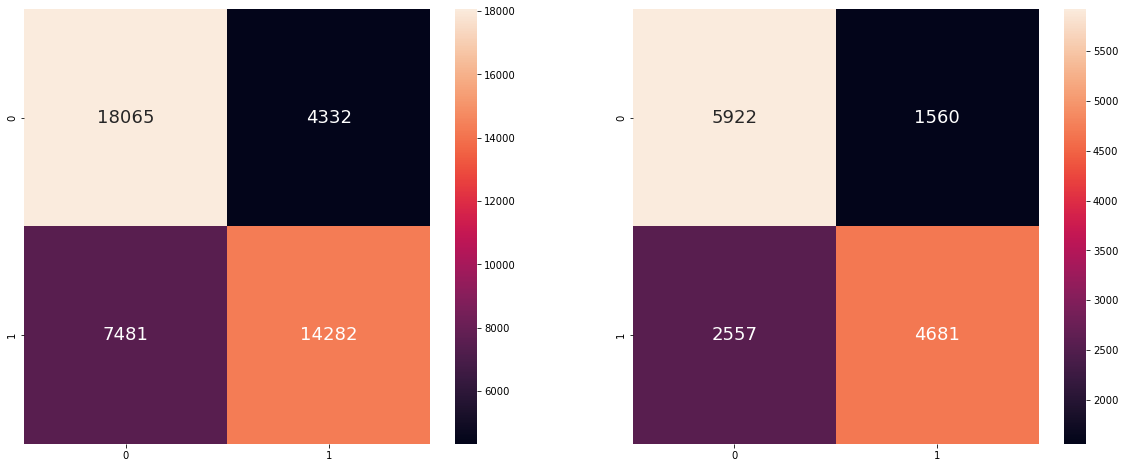

In [38]:
#Final KNN model 
knn = KNeighborsClassifier(n_neighbors = 40, weights = 'uniform', algorithm = 'ball_tree', p = 1)
knn.fit(X_train, y_train)
y_train_pred=knn.predict(X_train)
y_test_pred=knn.predict(X_test)
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_train_as = accuracy_score(y_train,y_train_pred)
knn_test_as = accuracy_score(y_test,y_test_pred)

# Check the Goodness of Fit (on Train Data)
print('train Classification report:\n',classification_report(y_train,y_train_pred))
print("Matthews corrcoef  (MCC) \t:", knn_train_mcc)
print('train accuracy:', knn_train_as)
print()

# Check the Goodness of Fit (on Test Data)
print('test Classification report:\n',classification_report(y_test,y_test_pred))
print("Matthews corrcoef  (MCC) \t:", knn_test_mcc)
print('test accuracy :', knn_test_as)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(20, 8))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])